<a href="https://colab.research.google.com/github/NguyenVanTrong-21130581/AI/blob/main/Proj_Covid_19_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import vào Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


2. Import thư viện

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import neighbors

3. Load dataset

In [4]:
data = pd.read_csv("Covid Data.csv")

Biểu đồ thể hiện sự phân bố độ tuổi(age)

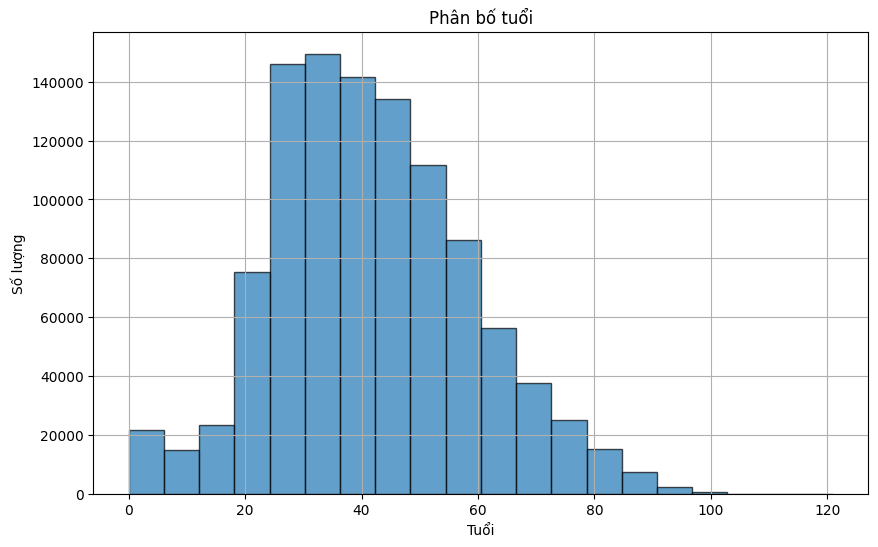

In [20]:

plt.figure(figsize=(10, 6))
plt.hist(data['AGE'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Phân bố tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()


Biểu đồ tình hình bệnh trong dataset

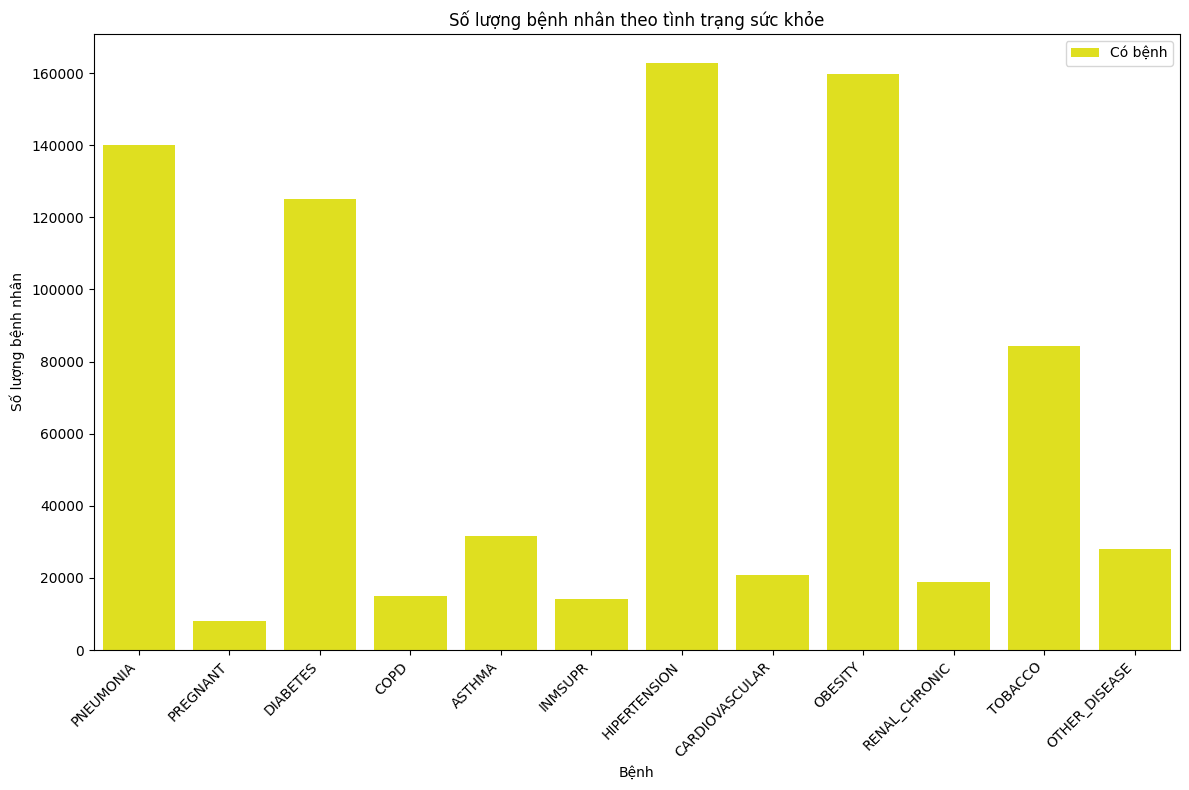

In [21]:

health_conditions = data[['PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA',
                          'INMSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'OTHER_DISEASE']]

condition_counts = health_conditions.apply(pd.value_counts).transpose()

plt.figure(figsize=(12, 8))
sns.barplot(x=condition_counts.index, y=condition_counts[1], color='yellow', label='Có bệnh')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Bệnh')
plt.ylabel('Số lượng bệnh nhân')
plt.title('Số lượng bệnh nhân theo tình trạng sức khỏe')
plt.legend()
plt.tight_layout()
plt.show()

4. Xử lí chuyển đổi dữ liệu

In [22]:

data['DATE_DIED'] = data['DATE_DIED'].apply(lambda x: 2 if x == '9999-99-99' else 1)

print(data.head(10))

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  DATE_DIED  INTUBED  PNEUMONIA  AGE  \
0      2             1    1             1          1       97          1   65   
1      2             1    2             1          1       97          1   72   
2      2             1    2             2          1        1          2   55   
3      2             1    1             1          1       97          2   53   
4      2             1    2             1          1       97          2   68   
5      2             1    1             2          2        2          1   40   
6      2             1    1             1          2       97          2   64   
7      2             1    1             1          2       97          1   64   
8      2             1    1             2          2        2          2   37   
9      2             1    1             2          2        2          2   25   

   PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0         2         2  ...      

5. Xử lí Missing data

In [27]:
data_copy = data.copy()

data_copy.replace([97, 98, 99], np.nan, inplace=True)
# chuyển đổi nhưng ngoại trừ cột AGE
age_column = data_copy['AGE']

data_no_age = data_copy.drop(columns=['AGE'])

imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data_no_age), columns=data_no_age.columns)

data_imputed['AGE'] = age_column

print(data_imputed.head(10))


   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  DATE_DIED  INTUBED  PNEUMONIA  \
0    2.0           1.0  1.0           1.0        1.0      2.0        1.0   
1    2.0           1.0  2.0           1.0        1.0      2.0        1.0   
2    2.0           1.0  2.0           2.0        1.0      1.0        2.0   
3    2.0           1.0  1.0           1.0        1.0      2.0        2.0   
4    2.0           1.0  2.0           1.0        1.0      2.0        2.0   
5    2.0           1.0  1.0           2.0        2.0      2.0        1.0   
6    2.0           1.0  1.0           1.0        2.0      2.0        2.0   
7    2.0           1.0  1.0           1.0        2.0      2.0        1.0   
8    2.0           1.0  1.0           2.0        2.0      2.0        2.0   
9    2.0           1.0  1.0           2.0        2.0      2.0        2.0   

   PREGNANT  DIABETES  COPD  ...  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0       2.0       2.0   2.0  ...      2.0           1.0            2.0   
1       2.0    

6. Xử lí Imbalanced data và chia dữ liệu

In [28]:

X = data_imputed.iloc[:, :4]
y = data_imputed.iloc[:, 4]

print("Số lượng mẫu của từng lớp trước khi SMOTE:")
print(y.value_counts())
print("\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
undersample = RandomUnderSampler(random_state=42)

pipeline = Pipeline(steps=[('o', smote), ('u', undersample)])


X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train_scaled, y_train)

print("Số lượng mẫu của từng lớp sau khi SMOTE:")
print(pd.Series(y_train_resampled).value_counts())
print("\n")



Số lượng mẫu của từng lớp trước khi SMOTE:
DATE_DIED
2.0    971633
1.0     76942
Name: count, dtype: int64


Số lượng mẫu của từng lớp sau khi SMOTE:
DATE_DIED
1.0    680143
2.0    680143
Name: count, dtype: int64




7. Feature selection

In [31]:

scaler = MinMaxScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_resampled_scaled = scaler.transform(X_test_scaled)

selector = SelectKBest(score_func=chi2, k=4)
X_train_selected = selector.fit_transform(X_train_resampled_scaled, y_train_resampled)
X_test_selected = selector.transform(X_test_resampled_scaled)

selected_features = selector.get_support(indices=True)
print("Các đặc trưng được chọn:", selected_features)


Các đặc trưng được chọn: [0 1 2 3]


8. Tìm kiếm best parameters cho thuật toán RandomForest

In [ ]:
param_distributions = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 4]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_selected, y_train_resampled)

print("Best Parameters found: ", random_search.best_params_)


Best Parameters found:  {'n_estimators': 200, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_depth': 20}


9. Áp dụng thuật toán RandomForest

In [35]:
rf_train = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=9, min_samples_leaf=1)
rf_train.fit(X_train_selected, y_train_resampled)

y_pred_rf = rf_train.predict(X_test_selected)

rf_accuracy = metrics.accuracy_score(y_test, y_pred_rf)
rf_decision = metrics.precision_score(y_test, y_pred_rf, average='macro')
rf_recall =  metrics.recall_score(y_test, y_pred_rf, average='macro')
rf_f1 = metrics.f1_score(y_test, y_pred_rf, average='macro')

print("Accuracy:", rf_accuracy)
print("Precision:", rf_decision)
print("Recall:", rf_recall)
print("F1 measure:", rf_f1)

Accuracy: 0.8667622459651655
Precision: 0.6692320405394742
Recall: 0.8897900249790603
F1 measure: 0.7127610576590203


10. Tìm kiếm best parameters cho thuật toán Multilayer Perceptron

In [ ]:

param_grid = {
 'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
 'max_iter': [50, 100, 150],
 'activation': ['tanh', 'relu'],
 'solver': ['sgd', 'adam'],
 'alpha': [0.0001, 0.05],
 'learning_rate': ['constant','adaptive'],
}

mlp = MLPClassifier(max_iter=200, random_state=42)

random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid,
                                   n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

random_search.fit(X_train_selected, y_train_resampled)

print("Best Parameters found: ", random_search.best_params_)


Best Parameters found:  {'solver': 'adam', 'max_iter': 50, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (120, 80, 40), 'alpha': 0.0001, 'activation': 'tanh'}


11. Áp dụng thuật toán Multilayer Perceptron

In [36]:
# Multilayer Perceptron
multilp = MLPClassifier(solver= 'adam', max_iter= 50, hidden_layer_sizes= (120,80,40), activation= 'tanh', alpha= 0.0001, learning_rate= 'adaptive')
multilp.fit(X_train_selected, y_train_resampled)
mlp_pred = multilp.predict(X_test_selected)

mlp_accuracy = metrics.accuracy_score(y_test, mlp_pred)
mlp_decision = metrics.precision_score(y_test, mlp_pred, average='macro')
mlp_recall =  metrics.recall_score(y_test, mlp_pred, average='macro')
mlp_f1 = metrics.f1_score(y_test, mlp_pred, average='macro')

print("Accuracy:", mlp_accuracy)
print("Precision:", mlp_decision)
print("Recall:", mlp_recall)
print("F1 measure:", mlp_f1)

Accuracy: 0.8670642426400231
Precision: 0.6694714730404683
Recall: 0.8898133613612869
F1 measure: 0.7130981872655959


12. Sử dụng KNN

In [37]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train_selected, y_train_resampled)
y_pred_knn = clf.predict(X_test_selected)

knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_decision = metrics.precision_score(y_test, y_pred_knn, average='macro')
knn_recall =  metrics.recall_score(y_test, y_pred_knn, average='macro')
knn_f1 = metrics.f1_score(y_test, y_pred_knn, average='macro')

print("Accuracy:", knn_accuracy)
print("Precision:", knn_decision)
print("Recall:", knn_recall)
print("F1 measure:", knn_f1)

Accuracy: 0.07522578225086068
Precision: 0.5325203959173794
Recall: 0.5008968754675612
F1 measure: 0.07047379904228658
